<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Capstone Project Milestone 2.5: Yelp Reviews EDA

_Author: Schubert H. Laforest (BOS)_

# Overview 
The goal of this notebook is to do extensive EDA on the Yelp review dataset specifically. Here, I will be getting a feel for the data, see what cleaning needs to be done, and get some general inferential statistics. Trying this.

## Guiding Questions
1) What can we learn from reviews? Can they be used to predict ratings 

## Methodology
- Randomly Sample the dataset: Since the CSV is over 3GBs large, it isn't feasible to perform EDA on the entire dataset. 
    - Basically, doing EDA on a random sample will give me a good idea of what the data looks like and I can deploy quick models to get a sense of how they perform on the given data. 
- 

**To do**:
- Subsection dataframe by year (cf Time Series in pandas lecture)
- Subsection by market (exploratory)
- Save to read-only csv (Thick carefully about how much data that will be, may need to be more judicious...)
- Test out new NLP packages 

# Notebook Guide

## Preprocessing 

In [3]:
# Loading up the Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading in the dataset 
reviews = pd.read_csv("~/capstone_project/data/yelp_review.csv")

In [5]:
# randomly sampling the data
chosen_idx = np.random.choice(1000, replace=False, size=1000)
reviews_trimmed = reviews.iloc[chosen_idx]

In [6]:
reviews_trimmed.shape

(1000, 9)

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261668 entries, 0 to 5261667
Data columns (total 9 columns):
review_id      object
user_id        object
business_id    object
stars          int64
date           object
text           object
useful         int64
funny          int64
cool           int64
dtypes: int64(4), object(5)
memory usage: 361.3+ MB


In [8]:
reviews.head(20)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0
5,HRPm3vEZ_F-33TYVT7Pebw,_4iMDXbXZ1p1ONG297YEAQ,8QWPlVQ6D-OExqXoaD2Z1g,5,2014-09-24,Cycle Pub Las Vegas was a blast! Got a groupon...,1,0,0
6,ymAUG8DZfQcFTBSOiaNN4w,u0LXt3Uea_GidxRW1xcsfg,9_CGhHMz8698M9-PkVf0CQ,4,2012-05-11,Who would have guess that you would be able to...,0,0,2
7,8UIishPUD92hXtScSga_gw,u0LXt3Uea_GidxRW1xcsfg,gkCorLgPyQLsptTHalL61g,4,2015-10-27,Always drove past this coffee house and wonder...,1,0,0
8,w41ZS9shepfO3uEyhXEWuQ,u0LXt3Uea_GidxRW1xcsfg,5r6-G9C4YLbC7Ziz57l3rQ,3,2013-02-09,"Not bad!! Love that there is a gluten-free, ve...",1,0,0
9,WF_QTN3p-thD74hqpp2j-Q,u0LXt3Uea_GidxRW1xcsfg,fDF_o2JPU8BR1Gya--jRIA,5,2016-04-06,Love this place!\n\nPeggy is great with dogs a...,3,0,0


In [9]:
len(reviews["user_id"].unique())

1326101

In [10]:
reviews["text"][0]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

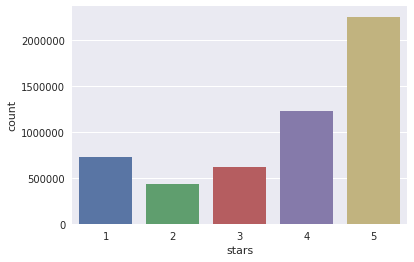

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(x="stars", data=reviews)

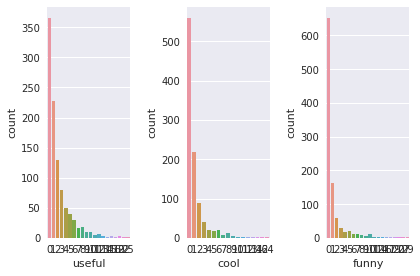

In [14]:
fig, axs = plt.subplots(ncols=3)
sns.countplot(x="useful", data=reviews_trimmed, ax=axs[0])
sns.countplot(x="cool", data=reviews_trimmed, ax=axs[1])
sns.countplot(x="funny", data=reviews_trimmed, ax=axs[2])
fig.tight_layout();

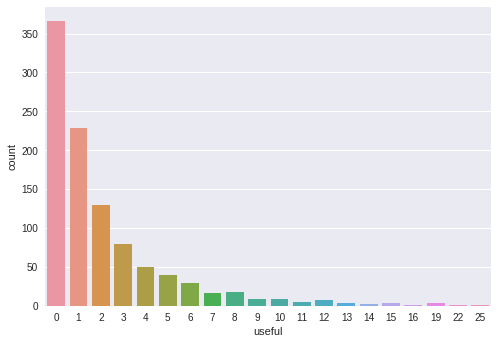

In [12]:
ax = sns.countplot(x="useful", data=reviews_trimmed)

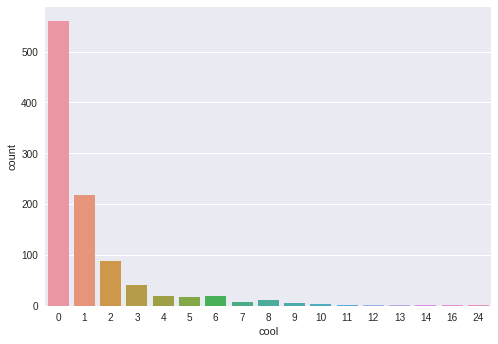

In [13]:
ax = sns.countplot(x="cool", data=reviews_trimmed)

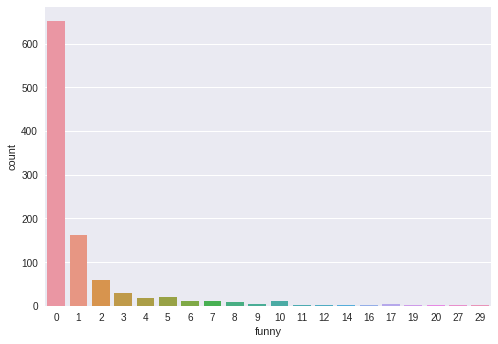

In [14]:
ax = sns.countplot(x="funny", data=reviews_trimmed)

In [33]:
reviews_trimmed["date"]

40     2010-03-31
164    2011-07-17
222    2015-09-26
252    2013-04-01
187    2014-04-27
515    2015-04-11
979    2017-11-30
955    2011-05-18
369    2016-03-12
347    2014-05-26
1      2016-05-28
302    2013-04-01
814    2011-01-01
942    2011-05-26
601    2009-07-17
49     2017-01-04
291    2017-04-20
913    2010-05-03
226    2013-02-03
135    2014-04-02
899    2010-04-17
353    2013-01-23
403    2016-05-22
431    2016-11-26
817    2009-09-21
63     2016-02-08
581    2017-04-20
866    2010-04-05
674    2015-08-16
159    2016-10-23
          ...    
430    2017-01-27
246    2013-04-04
0      2016-05-28
288    2017-04-20
16     2012-10-23
544    2007-06-16
432    2017-07-14
741    2011-05-18
747    2012-05-30
689    2015-11-08
465    2009-06-11
62     2016-02-08
950    2009-08-03
278    2017-04-25
795    2010-05-03
761    2009-08-24
297    2013-01-22
336    2017-02-16
799    2009-10-12
321    2014-04-26
652    2015-07-09
243    2014-04-25
550    2008-01-28
152    2016-12-18
79     201

Interesting.. We need to double check exactly over what course of time our data spans. 

In [34]:
# converting date column to datetime 
import datetime
reviews_trimmed["date"] = pd.to_datetime(reviews_trimmed["date"])

## Exploratory NLP

In [37]:
reviews_trimmed["text"][0]

"Super simple place but amazing nonetheless. It's been around since the 30's and they still serve the same thing they started with: a bologna and salami sandwich with mustard. \n\nStaff was very helpful and friendly."

In [38]:
# baseline
target = pd.Series(reviews_trimmed["stars"])
target.value_counts()/len(target)

4    0.332
3    0.259
5    0.229
2    0.111
1    0.069
Name: stars, dtype: float64

In [39]:
# NLP Using a count vectorizer.  
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# Seting up CVEC and fitting 
cvec = CountVectorizer()
cvec.fit(reviews_trimmed["text"]) # we have a bagillion data so not setting up test, this is exploratory

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [42]:
# Lets check the length of our data that is in a vectorized state
len(cvec.get_feature_names())

10406

In [43]:
# Transforming our x_train data using our fit cvec.
# And converting the result to a DataFrame.
X_train = pd.DataFrame(cvec.transform(reviews_trimmed['text']).todense(),
                       columns=cvec.get_feature_names())

In [44]:
# Which words appear the most?
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

the     8630
and     5592
to      4414
it      3334
was     2897
of      2878
is      2038
in      2034
for     1932
that    1898
you     1641
my      1488
but     1436
with    1404
they    1336
this    1327
on      1285
we      1118
have    1052
not     1032
dtype: int64

In [ ]:
# # Setting y, as we want to predict # of stars
# y_train = reviews_trimmed["stars"]

## More Robust NLP 

In [20]:
# NLP imports 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import re

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
# # randomly sampling the data to create test set
# chosen_idx = np.random.choice(1000, replace=False, size=1000)
# reviews_tr_test = reviews.iloc[chosen_idx]

In [ ]:
reviews[""]

In [17]:
def process_stem(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    
    p_stemmer = PorterStemmer()
    stop_words = stopwords.words("english")
    return ' '.join([p_stemmer.stem(word) for word in tokens if not word in stop_words])

In [18]:
def process_lem(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return ' '.join([lemmer.lemmatize(word) for word in tokens if not word in stop_words])

In [25]:
data_train_proc = [process_stem(text) for text in reviews_trimmed['text']]
# data_test_proc = [process_stem(text) for text in reviews_tr_test['text']]

In [29]:
data_train_proc[0]

'servic bad let exchang ingredi chang girlfriend pizza charg expens place sauc tast like regular supermarket tomato sauc crust chewi paid never go back anymor'